<a href="https://www.kaggle.com/code/sjagkoo7/ipl-dataset-practise-am?scriptVersionId=141410672" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipldata/matches.csv
/kaggle/input/ipldata/deliveries.csv


#  Reading the dataset

In [2]:
matches=pd.read_csv('/kaggle/input/ipldata/matches.csv')
ball=pd.read_csv('/kaggle/input/ipldata/deliveries.csv')

#  Pre-processing 

In [3]:
# matches.head() or matches.head(5)
#matches.describe()
#matches.size # it will retrun total element in matches data frame
#matches.shape # it will retrun no. of rows & cloumn in matches data frame
columns=list(matches.columns)
columns={k:v for v,k in enumerate(columns)} #converting column in dictionary mapping
columns

{'id': 0,
 'season': 1,
 'city': 2,
 'date': 3,
 'team1': 4,
 'team2': 5,
 'toss_winner': 6,
 'toss_decision': 7,
 'result': 8,
 'dl_applied': 9,
 'winner': 10,
 'win_by_runs': 11,
 'win_by_wickets': 12,
 'player_of_match': 13,
 'venue': 14,
 'umpire1': 15,
 'umpire2': 16,
 'umpire3': 17}

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
#matches.isna()
#matches.isnull()
#matches.notna()
#matches.notnull()
matches.isna().sum()
#matches.notna().sum()
#matches[matches.isna().any(axis=1)]

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Data Cleaning

### Till now id , season are fine but city having NaN values. so doing data cleaning on city

In [6]:
#matches.id.isna().sum()
#matches.id.unique()
#matches.season.isna().sum()
#matches.season.unique()
#matches.city.isna().sum()

* loc and iloc
* https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79   

In [7]:
#matches.loc[matches.city.isna()]
matches[matches.city.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [8]:
matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [9]:
matches[matches['city']=='Abu Dhabi']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
457,458,2014,Abu Dhabi,2014-04-16,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,41,0,JH Kallis,Sheikh Zayed Stadium,M Erasmus,RK Illingworth,NaN
459,460,2014,Abu Dhabi,2014-04-18,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
464,465,2014,Abu Dhabi,2014-04-21,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
470,471,2014,Abu Dhabi,2014-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium,HDPK Dharmasena,C Shamshuddin,NaN
471,472,2014,Abu Dhabi,2014-04-26,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,23,0,Sandeep Sharma,Sheikh Zayed Stadium,HDPK Dharmasena,RK Illingworth,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN


In [10]:
def matches_city(matches):
    matches['city'].replace(to_replace='Bengaluru',value='Bangalore',inplace=True)
matches_city(matches)
matches.city.fillna('Dubai',inplace=True)
matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

### Attributes require data cleaning

In [11]:
#matches.info()
#matches.date.isna().sum()
#matches.date.unique() # there is a scope of data cleaning
#matches.team1.isna().sum()
#matches.team1.unique() #there is a scope of data cleaning
#matches.team2.isna().sum()
#matches.team2.unique() #there is a scope of data cleaning
#matches.toss_winner.isna().sum()
#matches.toss_winner.unique() #there is a scope of data cleaning
#matches.toss_decision.isna().sum()
#matches.toss_decision.unique()
#matches.result.isna().sum()
#matches.result.unique()
#matches.dl_applied.isna().sum()
#matches.dl_applied.unique()
#matches.winner.isna().sum()
#matches.winner.unique() #there is a scope of data cleaning
#matches.win_by_runs.isna().sum()
#matches.win_by_runs.unique()
#matches.win_by_wickets.isna().sum()
#matches.win_by_wickets.unique()
#matches.player_of_match.isna().sum()
#matches.player_of_match.unique() #there is a scope of data cleaning
#matches.venue.isna().sum()
#matches.venue.unique()
#matches.umpire1.isna().sum()
#matches.umpire1.unique()#there is a scope of data cleaning
#matches.umpire2.isna().sum()
#matches.umpire2.unique() #there is a scope of data cleaning
#matches.umpire3.isna().sum()
#matches.umpire3.unique() #there is a scope of data cleaning

In [12]:
#matches.date.unique() # there is a scope of data cleaning
#matches.team1.unique() #there is a scope of data cleaning
#matches.team2.unique() #there is a scope of data cleaning
#matches.toss_winner.unique() #there is a scope of data cleaning
#matches.winner.unique() #there is a scope of data cleaning & having null values
#matches.player_of_match.unique() #there is a scope of data cleaning & having null values
#matches.umpire1.unique()#there is a scope of data cleaning & having null values
#matches.umpire2.unique() #there is a scope of data cleaning & having null values
#matches.umpire3.unique() #there is a scope of data cleaning & having null values

### Dealing with NaN values

In [13]:
#matches[matches.winner.isna()]
#matches[matches.player_of_match.isna()]
#matches[matches.umpire1.isna()]
#matches[matches.umpire2.isna()]
#matches[matches.umpire3.isna()]

### Dealing with team name in whole dataset

In [14]:
#matches.team1.unique()
matches.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

* **Rising Pune Supergiant, Pune Warriors , Rising Pune Supergiants** and **Delhi Daredevils,Delhi Capitals** having diffrent name of same team.

In [15]:
matches.replace(to_replace=['Rising Pune Supergiant','Pune Warriors'],value='Rising Pune Supergiants',inplace=True)
matches.replace(to_replace='Delhi Daredevils',value='Delhi Capitals',inplace=True)


In [16]:
matches.team1.unique()
# matches.team2.unique()
# matches.toss_winner.unique()
# matches.winner.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

### now data cleaniing is done and moving towards 
# feature engineering

* As we know umpire3 having mostly null and not muvh use hence dropping the umpire3 column.

In [17]:
#matches.drop('umpire3',axis=1,inplace=True)
matches.drop('umpire3',axis=1,inplace=True)

In [18]:
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

## so we are done with feature engineering and moving towrards 
# Exploratory Data Analysis and Visualization

# How many matches we’ve got in the dataset?means how many rows present in matches dataset

In [19]:
#len(matches.index)
#matches.shape[0]
len(matches)


756

* No.of columns present in the dataset

In [20]:
#matches.shape[1]
len(matches.columns)

17

# How many seasons we’ve got in the dataset?

In [21]:
len(matches.season.unique())

12

# The most successful IPL team

#### Similar Questions
1. Which are the cities where IPL matches has been played??
2. The venue that hosted the maximum number of matches
3. The team that won the most number of toss

In [22]:
# Method 1 :
data=matches.winner.value_counts().reset_index()
data.columns=['team','no_of_time_won']
data
# Method 2:
# data=matches.winner.value_counts()
# team_wins_df=pd.DataFrame(columns=['team','no_of_time_won'])
# for items in data.items():
#     temp=pd.DataFrame({'team':[items[0]],'no_of_time_won':[items[1]]})
#     team_wins_df=team_wins_df.append(temp,ignore_index=True)
# team_wins_df
#Method 3 :
# team=matches.winner.value_counts()[:10].to_dict().keys()
# no_of_time_won=matches.winner.value_counts()[:10].to_dict().values()
# no_of_time_won


,team,no_of_time_won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiants,27


In [23]:
#data.iloc[0,:]
#data.loc[0]
data.iloc[0]


team              Mumbai Indians
no_of_time_won               109
Name: 0, dtype: object

<AxesSubplot:title={'center':'The most successful IPL team'}, xlabel='no_of_time_won', ylabel='team'>

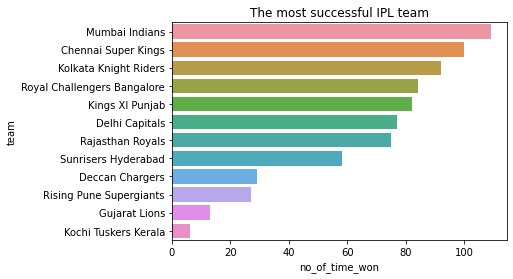

In [24]:
plt.title('The most successful IPL team')
#sns.barplot(x=data['no_of_time_won'],y=data['team'])
sns.barplot(data=data,x='no_of_time_won',y='team')

# Which season had most number of matches?

In [25]:
data=matches.season.value_counts().reset_index()
data.columns=['season','total_matches']
data

,season,total_matches
0,2013,76
1,2012,74
2,2011,73
3,2010,60
4,2014,60
5,2016,60
6,2018,60
7,2019,60
8,2017,59
9,2015,59


<AxesSubplot:title={'center':'Season vs Matches Played'}, xlabel='season', ylabel='total_matches'>

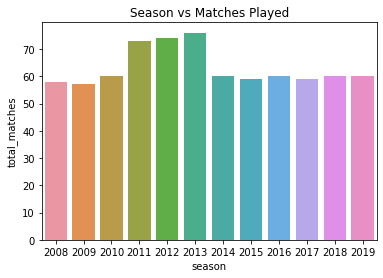

In [26]:
#help(sns.countplot)
plt.title('Season vs Matches Played')
# sns.countplot(x='season',data=matches)
sns.barplot(x=data['season'],y=data['total_matches'])

# The team with the most number of wins per season.

In [27]:
win_per_season = matches.groupby('season').winner.value_counts()
win_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [28]:
win_per_season_df=pd.DataFrame(columns=['season','team','no_of_time_won'])
year=2008
for items in win_per_season.items():
    if(items[0][0]==year):
        print(items)
        temp=pd.DataFrame({'season':[items[0][0]],'team':[items[0][1]],'no_of_time_won':[items[1]]})
        win_per_season_df=win_per_season_df.append(temp,ignore_index=True)
        year=year+1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Capitals'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [29]:
win_per_season_df

,season,team,no_of_time_won
0,2008,Rajasthan Royals,13
1,2009,Delhi Capitals,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Chennai Super Kings,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


In [30]:
win_per_season_df.iloc[0]

season                        2008
team              Rajasthan Royals
no_of_time_won                  13
Name: 0, dtype: object

# Which Team had won by maximum runs?

#### Similar Questions
* Which Team had won by closest Margin (minimum runs)?
* Which Team had won by maximum wicket?
* Which Team had won by minimum wicket?

In [31]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

In [32]:
win_by_runs=matches.groupby('winner'). win_by_runs.value_counts()
win_by_runs

winner               win_by_runs
Chennai Super Kings  0              48
                     13              3
                     18              3
                     24              3
                     38              3
                                    ..
Sunrisers Hyderabad  35              1
                     45              1
                     48              1
                     85              1
                     118             1
Name: win_by_runs, Length: 271, dtype: int64

In [33]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2                Delhi Capitals
toss_winner          Delhi Capitals
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

In [34]:
matches.iloc[matches.win_by_runs.idxmax()].winner

'Mumbai Indians'

# Which Team had won by closest Margin (minimum runs)?

In [35]:
matches.groupby('winner').win_by_runs.value_counts()

winner               win_by_runs
Chennai Super Kings  0              48
                     13              3
                     18              3
                     24              3
                     38              3
                                    ..
Sunrisers Hyderabad  35              1
                     45              1
                     48              1
                     85              1
                     118             1
Name: win_by_runs, Length: 271, dtype: int64

In [36]:
matches.iloc[matches.win_by_runs.idxmin()]

id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                              Rising Pune Supergiants
toss_winner                        Rising Pune Supergiants
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                             Rising Pune Supergiants
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

> **Instead of just getting the minimum score (which always would be 0), we have subsetted the data that has win_by_runs greater than or equal to 1 (there by eliminating the zero-issue).

In [37]:
matches[matches.win_by_runs.ge(1)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon
743,11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon


In [38]:
matches.iloc[matches[matches.win_by_runs.ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                Rising Pune Supergiants
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [39]:
matches.iloc[matches[matches.win_by_runs.ge(1)].win_by_runs.idxmin()].winner

'Mumbai Indians'

# Top **player of the match** Winners

In [40]:
data=matches.player_of_match.value_counts().reset_index()
data.columns=['Player_Name','No_of_time_player_of_match']
data=data.head(10)
data

,Player_Name,No_of_time_player_of_match
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


<AxesSubplot:title={'center':'Top 10 Player of  the match'}, xlabel='No_of_time_player_of_match', ylabel='Player_Name'>

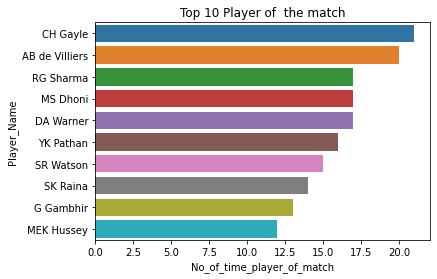

In [41]:
plt.title('Top 10 Player of  the match')
sns.barplot(y=data['Player_Name'],x=data['No_of_time_player_of_match'])

In [42]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

# Reference
- https://jovian.ai/pratham-10/eda-of-ipl
- https://towardsdatascience.com/exploratory-data-analysis-of-ipl-matches-part-1-c3555b15edbb
- https://towardsdatascience.com/analysing-ipl-data-to-begin-data-analytics-with-python-5d2f610126a

# Thank You
* Please upvote if found helpful. I would love to hear comment.